<a href="https://colab.research.google.com/github/yug201/uber_taxi_fare_price_prediction/blob/main/uber_taxi_fare_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'uber-fares-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1834623%2F2994100%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240730%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240730T174813Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D57ef689a11612f83396d219aa235e27d566b10c68ed22c9a045b0c040cf9296aef319df2f35d486a80ca81d30ef8a278cf6cbb77b8210a477193b8b5c2e0bceae9b6553ba52d208cdd2cc90224bfdfddb637622aae602b274b2ae3f32cb8dda7bd45d4888fb8707e7eb2a13fc6cb09e5d66f158bdb98e2bc12d9adc9d8cd1aa845524869cf056d6675f7804fa732505b741fbf222e728a1639bb3d3a6333a88e6f20e70ef155e88d40abc2d59087fd4cd3ff78d2529ed8bed923351b20c70ed32759b64a8f4c37d1c29fdf7b0703e2663989b6acbe84ae7ba0abf44e48217e49a9ab07b82772a0ab2a1f766b100cc71c808805aa00927b622775ff1f716f7ae4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 7378081 bytes downloaded
Downloaded and uncompressed: uber-fares-dataset
Data source import complete.


In [2]:
import pandas as pd


file_path = '/kaggle/input/uber-fares-dataset/uber.csv'

df1 = pd.read_csv(file_path)
df=df1[120000:]
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120000,34537282,2014-12-13 23:39:54.0000005,10.5,2014-12-13 23:39:54 UTC,-73.939981,40.708272,-73.965288,40.716973,1
120001,45658607,2015-04-20 13:42:59.0000003,6.0,2015-04-20 13:42:59 UTC,-73.991226,40.755348,-74.002968,40.749760,4
120002,728539,2010-07-01 22:42:35.0000002,10.1,2010-07-01 22:42:35 UTC,-73.982567,40.723176,-73.968064,40.759757,2
120003,8620590,2012-10-20 09:10:15.0000001,12.0,2012-10-20 09:10:15 UTC,0.000000,0.000000,0.000000,0.000000,1
120004,49514025,2011-06-23 15:42:00.000000146,12.1,2011-06-23 15:42:00 UTC,-73.984303,40.764945,-73.952295,40.792242,1


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:

df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120000,2014-12-13 23:39:54.0000005,10.5,2014-12-13 23:39:54 UTC,-73.939981,40.708272,-73.965288,40.716973,1
120001,2015-04-20 13:42:59.0000003,6.0,2015-04-20 13:42:59 UTC,-73.991226,40.755348,-74.002968,40.749760,4
120002,2010-07-01 22:42:35.0000002,10.1,2010-07-01 22:42:35 UTC,-73.982567,40.723176,-73.968064,40.759757,2
120003,2012-10-20 09:10:15.0000001,12.0,2012-10-20 09:10:15 UTC,0.000000,0.000000,0.000000,0.000000,1
120004,2011-06-23 15:42:00.000000146,12.1,2011-06-23 15:42:00 UTC,-73.984303,40.764945,-73.952295,40.792242,1


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 120000 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                80000 non-null  object 
 1   fare_amount        80000 non-null  float64
 2   pickup_datetime    80000 non-null  object 
 3   pickup_longitude   80000 non-null  float64
 4   pickup_latitude    80000 non-null  float64
 5   dropoff_longitude  80000 non-null  float64
 6   dropoff_latitude   80000 non-null  float64
 7   passenger_count    80000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 4.9+ MB


In [6]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,11.334150,-72.557641,39.937849,-72.535128,39.947880,1.692438
std,9.955174,11.115709,5.988718,10.306852,6.186449,1.316336
min,-50.500000,-768.550000,-74.010777,-75.417737,-74.006547,0.000000
25%,6.000000,-73.992130,40.734802,-73.991437,40.733898,1.000000
50%,8.500000,-73.981880,40.752480,-73.980140,40.753110,1.000000
75%,12.500000,-73.967307,40.767187,-73.963616,40.767945,2.000000
max,499.000000,40.806012,48.018760,40.816252,493.533332,6.000000


In [7]:

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %Z')

print(df.head())


                                  key  fare_amount           pickup_datetime  \
120000    2014-12-13 23:39:54.0000005         10.5 2014-12-13 23:39:54+00:00   
120001    2015-04-20 13:42:59.0000003          6.0 2015-04-20 13:42:59+00:00   
120002    2010-07-01 22:42:35.0000002         10.1 2010-07-01 22:42:35+00:00   
120003    2012-10-20 09:10:15.0000001         12.0 2012-10-20 09:10:15+00:00   
120004  2011-06-23 15:42:00.000000146         12.1 2011-06-23 15:42:00+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
120000        -73.939981        40.708272         -73.965288   
120001        -73.991226        40.755348         -74.002968   
120002        -73.982567        40.723176         -73.968064   
120003          0.000000         0.000000           0.000000   
120004        -73.984303        40.764945         -73.952295   

        dropoff_latitude  passenger_count  
120000         40.716973                1  
120001         40.749760                4  
12

In [8]:


# Extracting useful features from the 'datetime' column
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['second'] = df['pickup_datetime'].dt.second

print(df.head(10))


                                  key  fare_amount           pickup_datetime  \
120000    2014-12-13 23:39:54.0000005         10.5 2014-12-13 23:39:54+00:00   
120001    2015-04-20 13:42:59.0000003          6.0 2015-04-20 13:42:59+00:00   
120002    2010-07-01 22:42:35.0000002         10.1 2010-07-01 22:42:35+00:00   
120003    2012-10-20 09:10:15.0000001         12.0 2012-10-20 09:10:15+00:00   
120004  2011-06-23 15:42:00.000000146         12.1 2011-06-23 15:42:00+00:00   
120005    2015-04-25 17:21:03.0000001         13.0 2015-04-25 17:21:03+00:00   
120006  2010-01-09 15:45:00.000000217          9.3 2010-01-09 15:45:00+00:00   
120007  2009-10-24 23:30:00.000000208          4.1 2009-10-24 23:30:00+00:00   
120008    2010-07-04 01:24:08.0000005          7.7 2010-07-04 01:24:08+00:00   
120009   2011-05-30 00:43:00.00000027          6.5 2011-05-30 00:43:00+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
120000        -73.939981        40.708272         -73.9

In [9]:
df = df.drop(columns=['pickup_datetime',"key"])

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr()
correlation_with_fare_amount = correlation_matrix['fare_amount'].sort_values(ascending=False)
print(correlation_with_fare_amount)


fare_amount          1.000000
year                 0.117583
month                0.019707
passenger_count      0.016266
pickup_longitude     0.008966
dropoff_longitude    0.007508
day                 -0.000308
second              -0.000734
minute              -0.007419
dropoff_latitude    -0.008413
pickup_latitude     -0.008743
hour                -0.029656
Name: fare_amount, dtype: float64


In [11]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
120000,10.5,-73.939981,40.708272,-73.965288,40.716973,1,2014,12,13,23,39,54
120001,6.0,-73.991226,40.755348,-74.002968,40.749760,4,2015,4,20,13,42,59
120002,10.1,-73.982567,40.723176,-73.968064,40.759757,2,2010,7,1,22,42,35
120003,12.0,0.000000,0.000000,0.000000,0.000000,1,2012,10,20,9,10,15
120004,12.1,-73.984303,40.764945,-73.952295,40.792242,1,2011,6,23,15,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,49,0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,9,0
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,42,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,56,25


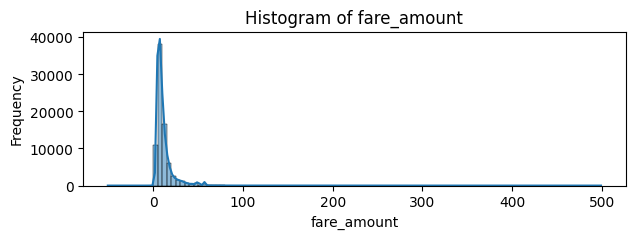

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


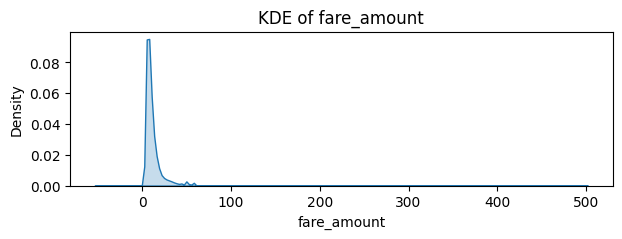

Skewness of fare_amount: 5.19


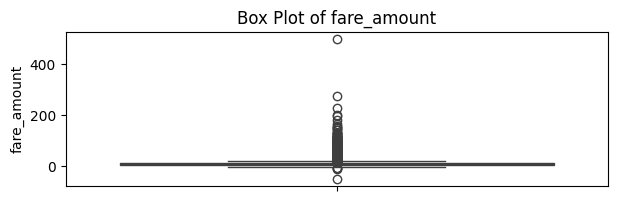

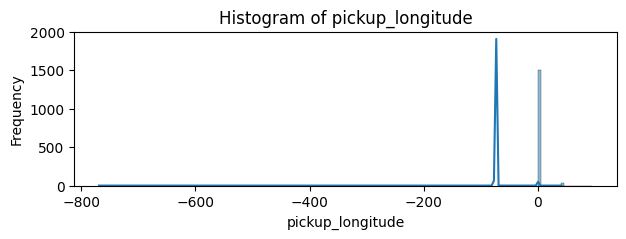

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


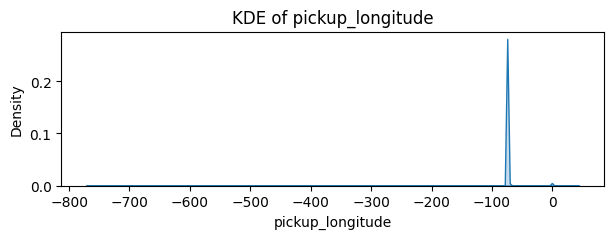

Skewness of pickup_longitude: -2.71


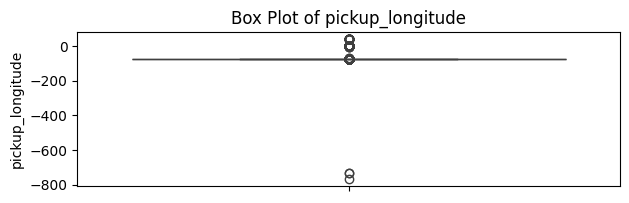

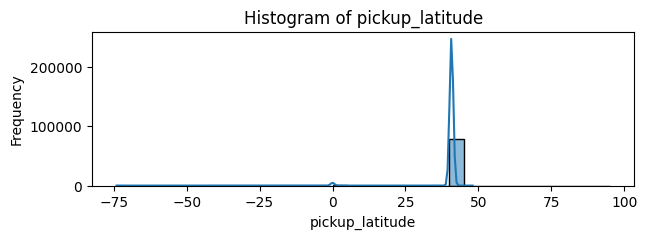

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


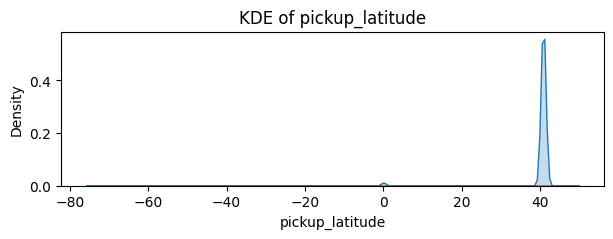

Skewness of pickup_latitude: -8.33


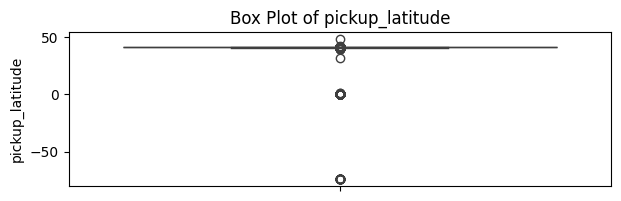

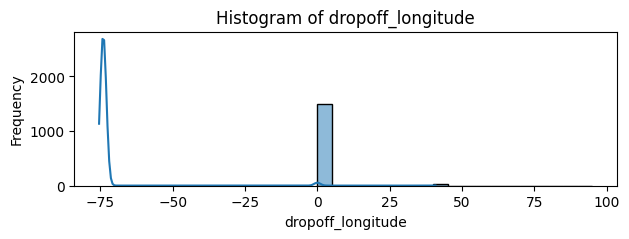

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


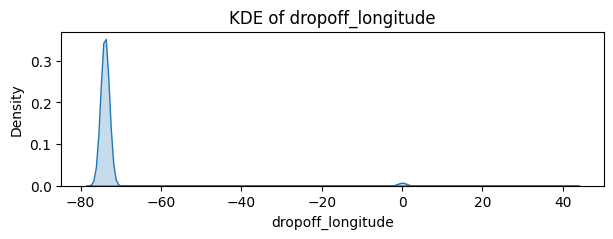

Skewness of dropoff_longitude: 7.09


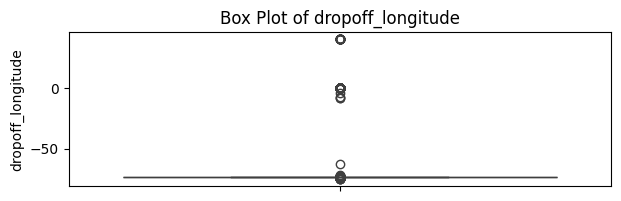

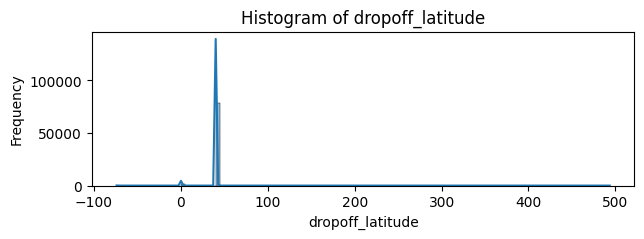

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


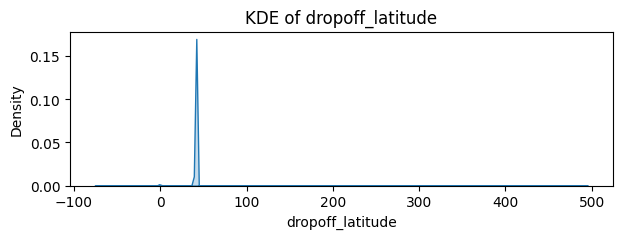

Skewness of dropoff_latitude: -2.61


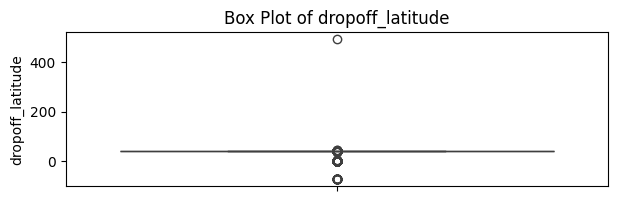

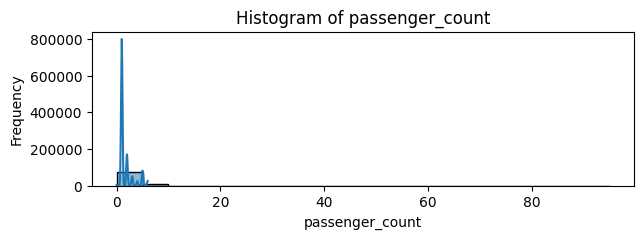

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


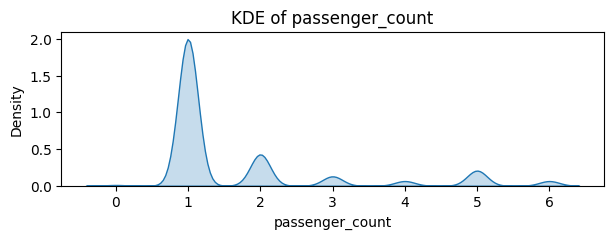

Skewness of passenger_count: 1.95


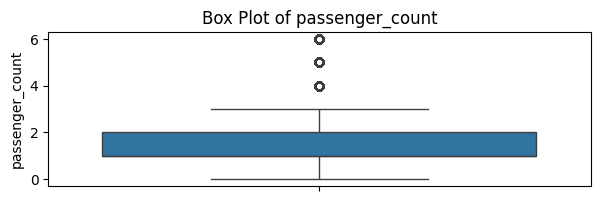

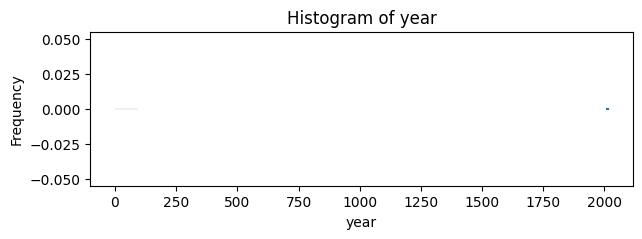

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


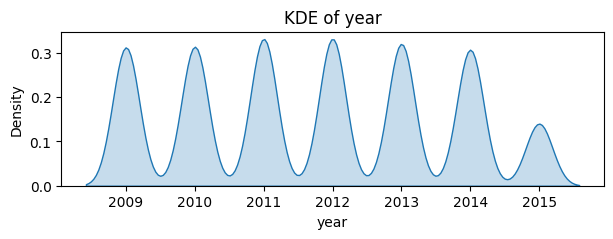

Skewness of year: 0.07


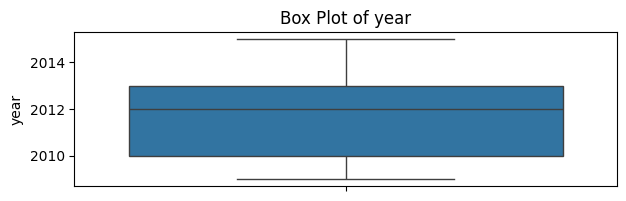

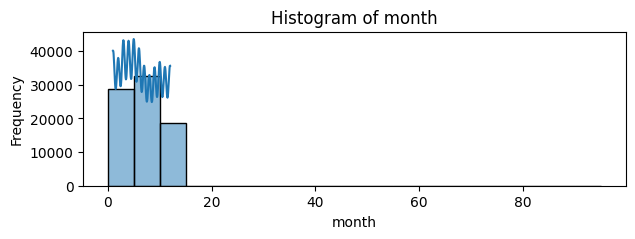

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


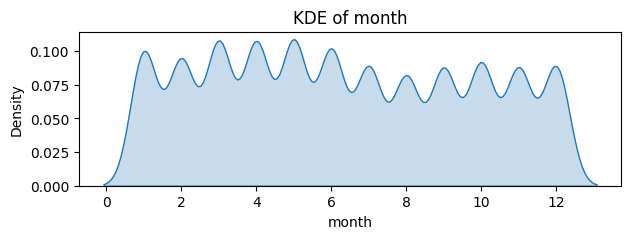

Skewness of month: 0.11


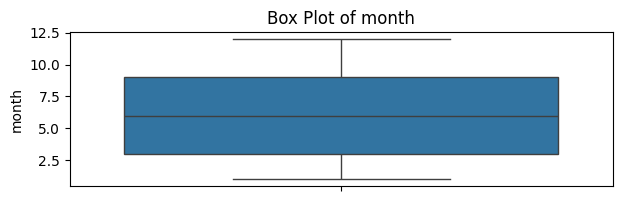

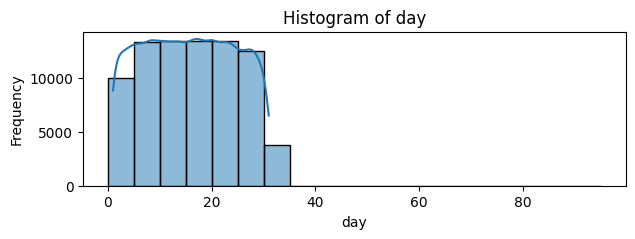

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


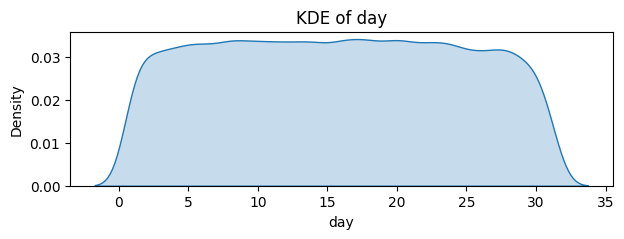

Skewness of day: 0.01


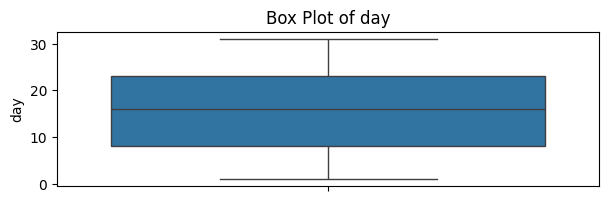

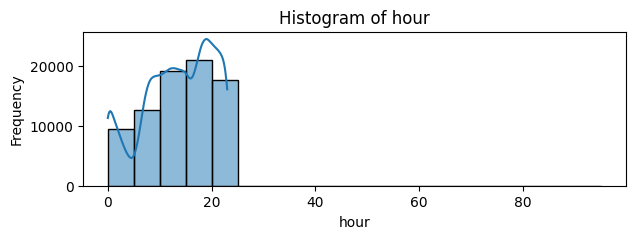

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


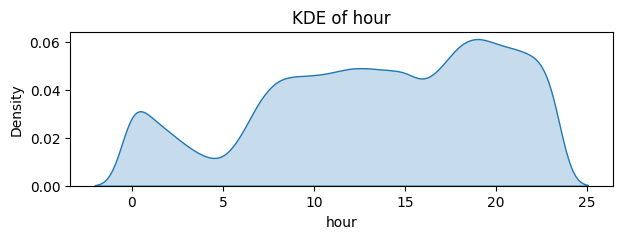

Skewness of hour: -0.43


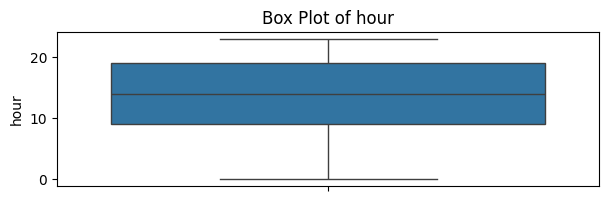

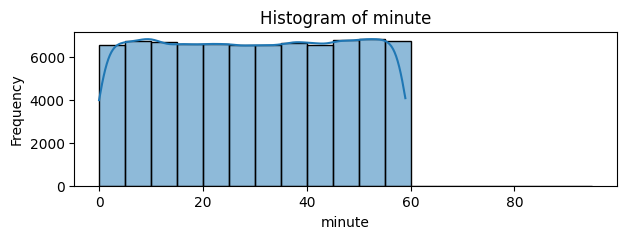

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


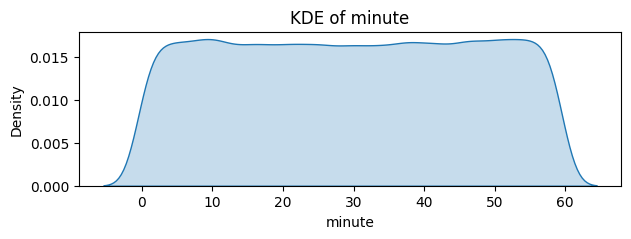

Skewness of minute: -0.01


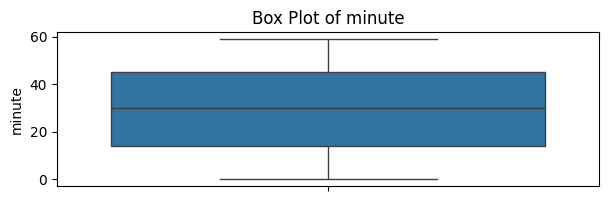

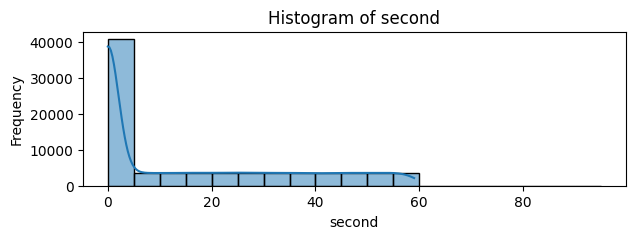

<ipython-input-12-018cb0681ad0>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[column], shade=True)


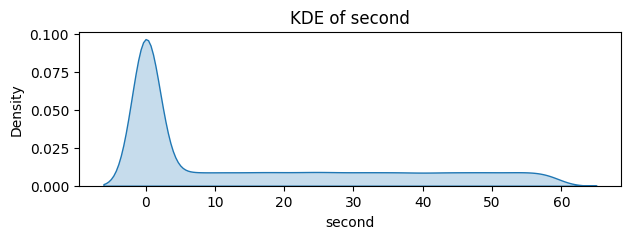

Skewness of second: 0.85


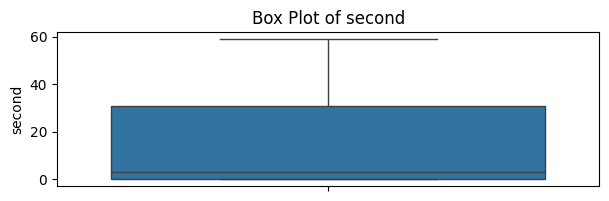

Descriptive Statistics:
        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  80000.000000      80000.000000     80000.000000       80000.000000   
mean      11.334150        -72.557641        39.937849         -72.535128   
std        9.955174         11.115709         5.988718          10.306852   
min      -50.500000       -768.550000       -74.010777         -75.417737   
25%        6.000000        -73.992130        40.734802         -73.991437   
50%        8.500000        -73.981880        40.752480         -73.980140   
75%       12.500000        -73.967307        40.767187         -73.963616   
max      499.000000         40.806012        48.018760          40.816252   

       dropoff_latitude  passenger_count          year         month  \
count      80000.000000     80000.000000  80000.000000  80000.000000   
mean          39.947880         1.692438   2011.737075      6.287575   
std            6.186449         1.316336      1.853467      3.4383

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


for column in df.columns:

    if pd.api.types.is_numeric_dtype(df[column]):
        # Histogram plot
        plt.figure(figsize=(7, 2))
        ax = sns.histplot(df[column], bins=range(0,100,5),kde=True, edgecolor='black')

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()
        #

        # KDE plot
        plt.figure(figsize=(7, 2))
        ax = sns.kdeplot(df[column], shade=True)
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.title(f'KDE of {column}')
        plt.show()

        # Print skewness
        skewness = df[column].skew()
        print(f"Skewness of {column}: {skewness:.2f}")

        plt.figure(figsize=(7, 2))
        ax = sns.boxplot(y=df[column])
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)
        plt.show()


print("Descriptive Statistics:")
print(df.describe())


#random forest


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('fare_amount',axis=1).values
y=df['fare_amount'].values
x_train , x_test , y_train , y_test =train_test_split(x,y, test_size= 0.8, random_state= 42)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf = RandomForestRegressor(max_depth=10 , max_features=3,n_estimators= 100)
rf.fit(x_train, y_train)
rf.score(x_train , y_train)
rf.score(x_test , y_test)

In [21]:
y_pred = rf.predict(x_test)
y_pred
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df3.head(20)

,Y_test,Y_pred
0,5.50,9.888660
1,6.10,8.154809
2,19.30,28.562808
3,15.00,14.247703
4,3.30,8.338195
5,8.50,9.591999
6,9.70,8.637724
7,5.50,9.659566
8,10.50,9.341514
9,5.50,9.558318


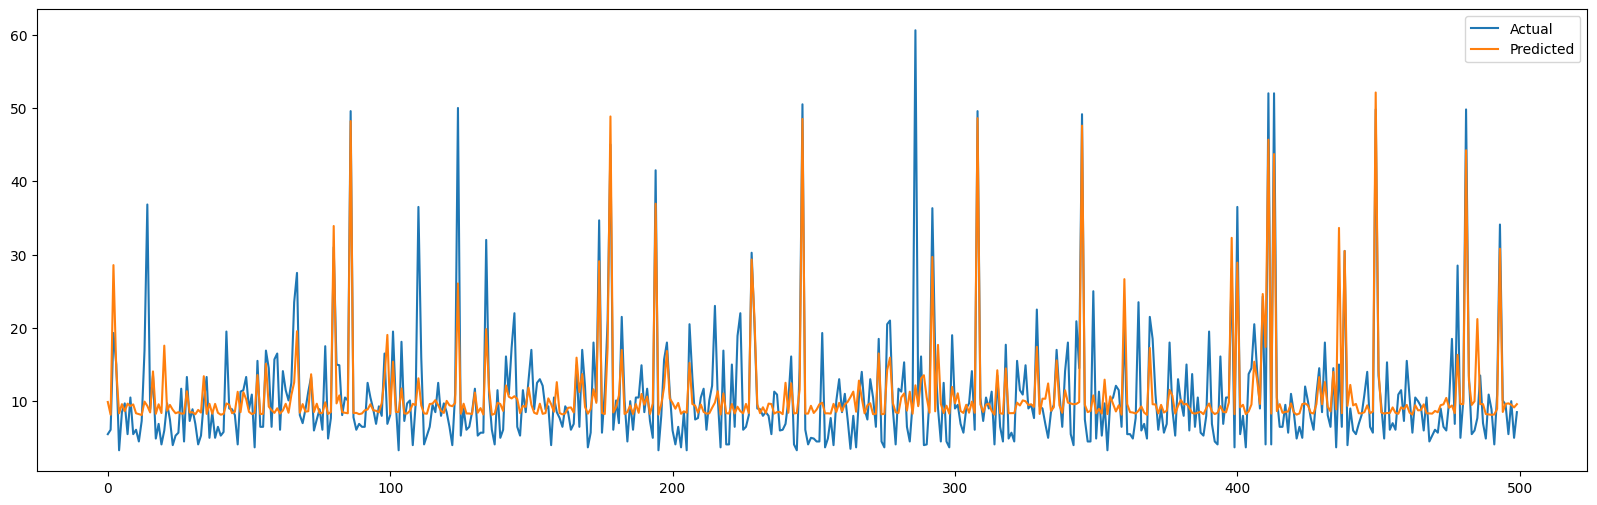

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize= (20,6))

plt.plot(df3[:500])
plt.legend(["Actual" , "Predicted"])

In [16]:
from sklearn.metrics import r2_score
rf_score = r2_score(y_test , y_pred)
rf_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
mse = mean_squared_error (y_test , y_pred)
print (mse)

mae = mean_absolute_error (y_test , y_pred)
print (mae)

mape = mean_absolute_percentage_error (y_test , y_pred)
print (mape)

37.823505533088884
3.882172757009884
1638380054217.5786


In [17]:
import pandas as pd


file_path = '/kaggle/input/uber-fares-dataset/uber.csv'

df1 = pd.read_csv(file_path)
df2=df1[:70000]
df2.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
from sklearn.model_selection import train_test_split
x2=df.drop('fare_amount',axis=1).values
y2=df['fare_amount'].values
x_train2 , x_test2 , y_train2 , y_test2 =train_test_split(x2,y2, test_size= .8, random_state= 42)
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor()
# rf = RandomForestRegressor(max_depth=7 , max_features=3,n_estimators= 100)
# rf.fit(x_train2, y_train2)
# rf.score(x_train2 , y_train2)
# rf.score(x_test 2, y_test2)

In [19]:
y_pred = rf.predict(x_test2)
y_pred
df3 = pd.DataFrame({"Y_test": y_test2 , "Y_pred" : y_pred})
df3.head(20)

,Y_test,Y_pred
0,5.50,10.031117
1,6.10,8.724421
2,19.30,28.269967
3,15.00,13.049679
4,3.30,8.779271
5,8.50,9.878742
6,9.70,8.822336
7,5.50,9.836747
8,10.50,9.168982
9,5.50,9.803076
